# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [ ]:
# #https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
# !pip install gdown
# !gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv("D:\Tuwaiq Academy\Tuwaiq_Academy_T5_Week_5\Weekly_Project\Dataset\Bus_Breakdown_and_Delays.csv")
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [4]:
df['Incident_Number']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
147967         NaN
147968         NaN
147969    90323827
147970         NaN
147971         NaN
Name: Incident_Number, Length: 147972, dtype: object

### what is the importance of the incident number ? I will drop it

In [5]:
df['Busbreakdown_ID']

0         1224901
1         1225098
2         1215800
3         1215511
4         1215828
           ...   
147967    1338452
147968    1341521
147969    1353044
147970    1353045
147971    1353046
Name: Busbreakdown_ID, Length: 147972, dtype: int64

### I don't think we need the breakdown number

In [6]:
df['Boro']

0            Bronx
1            Bronx
2            Bronx
3            Bronx
4            Bronx
            ...   
147967       Bronx
147968       Bronx
147969       Bronx
147970      Queens
147971    Brooklyn
Name: Boro, Length: 147972, dtype: object

### this shows the district where the accident happend I should encode it 

In [7]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,1.479720e+05,147972.000000
mean,1.287779e+06,3.590071
std,4.324338e+04,55.365859
min,1.212681e+06,0.000000
25%,1.250438e+06,0.000000
50%,1.287844e+06,0.000000
75%,1.325191e+06,4.000000
max,1.362605e+06,9007.000000


In [8]:
df.isna().sum()

School_Year                             0
Busbreakdown_ID                         0
Run_Type                               89
Bus_No                                  0
Route_Number                           88
Reason                                102
Schools_Serviced                        0
Occurred_On                             0
Created_On                              0
Boro                                 6318
Bus_Company_Name                        0
How_Long_Delayed                    21630
Number_Of_Students_On_The_Bus           0
Has_Contractor_Notified_Schools         0
Has_Contractor_Notified_Parents         0
Have_You_Alerted_OPT                    0
Informed_On                             0
Incident_Number                    142340
Last_Updated_On                         0
Breakdown_or_Running_Late               0
School_Age_or_PreK                      0
dtype: int64

In [9]:
df['How_Long_Delayed']

0          10MINUTES
1         25 MINUTES
2         15 MINUTES
3         10 minutes
4          10MINUTES
             ...    
147967         15-20
147968       20 MINS
147969     20-25MINS
147970           NaN
147971         45min
Name: How_Long_Delayed, Length: 147972, dtype: object

### I think this is very importance we should fill the missing value with the most repeated value

In [10]:
df['Reason'], df['Route_Number']

(0                 Other
 1         Heavy Traffic
 2         Heavy Traffic
 3                 Other
 4                 Other
               ...      
 147967    Heavy Traffic
 147968    Heavy Traffic
 147969    Heavy Traffic
 147970      Won`t Start
 147971            Other
 Name: Reason, Length: 147972, dtype: object,
 0            1
 1            1
 2            2
 3            2
 4            2
           ... 
 147967       2
 147968       5
 147969    X928
 147970    Q920
 147971    K617
 Name: Route_Number, Length: 147972, dtype: object)

In [11]:
df['Reason'].unique()

array(['Other', 'Heavy Traffic', 'Flat Tire', 'Mechanical Problem',
       'Delayed by School', 'Problem Run', 'Late return from Field Trip',
       'Won`t Start', 'Weather Conditions', 'Accident', nan], dtype=object)

### the reason and route number have very small number of missing values I will drop the rows 

In [12]:
df['How_Long_Delayed'].unique()

array(['10MINUTES', '25 MINUTES', '15 MINUTES', ..., '40 -50 MIN',
       '80 MIN', '45 MINIUTE'], dtype=object)

In [13]:
df['Run_Type'].unique()

array(['Pre-K/EI', 'Special Ed AM Run', 'General Ed AM Run',
       'Special Ed PM Run', 'General Ed PM Run', 'Special Ed Field Trip',
       'General Ed Field Trip', nan, 'Project Read PM Run',
       'Project Read AM Run', 'Project Read Field Trip'], dtype=object)

In [14]:
df['Breakdown_or_Running_Late'].unique()

array(['Running Late', 'Breakdown'], dtype=object)

### this is also is very small number I will remove the rows

In [15]:
df.duplicated().sum()

0

In [16]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

<Axes: >

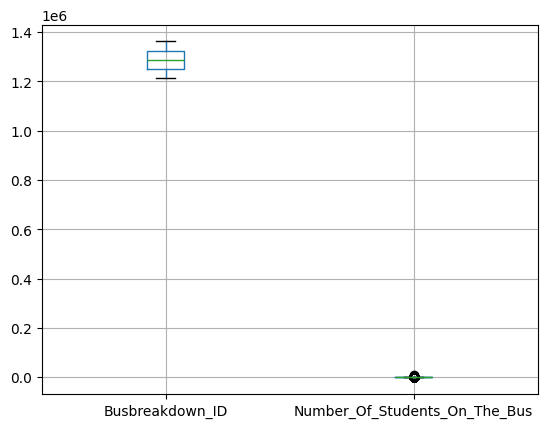

In [17]:
df.boxplot()

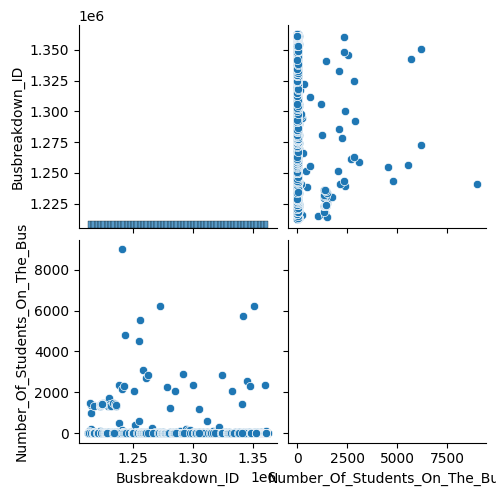

In [18]:
sns.pairplot(df)
plt.show()

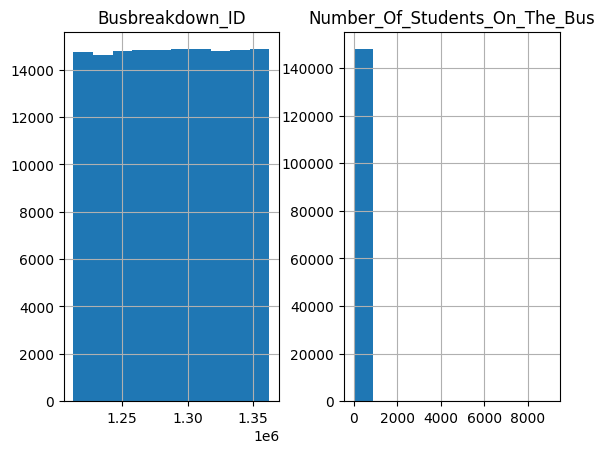

In [19]:
df.hist()
plt.show()

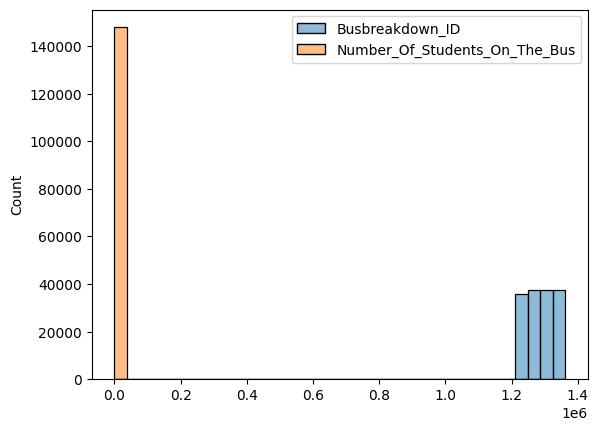

In [20]:
sns.histplot(df)
plt.show()

In [21]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Incident_Number',
       'Last_Updated_On', 'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [22]:
df.shape

(147972, 21)

In [23]:
df.dtypes

School_Year                        object
Busbreakdown_ID                     int64
Run_Type                           object
Bus_No                             object
Route_Number                       object
Reason                             object
Schools_Serviced                   object
Occurred_On                        object
Created_On                         object
Boro                               object
Bus_Company_Name                   object
How_Long_Delayed                   object
Number_Of_Students_On_The_Bus       int64
Has_Contractor_Notified_Schools    object
Has_Contractor_Notified_Parents    object
Have_You_Alerted_OPT               object
Informed_On                        object
Incident_Number                    object
Last_Updated_On                    object
Breakdown_or_Running_Late          object
School_Age_or_PreK                 object
dtype: object

In [24]:
df['Number_Of_Students_On_The_Bus'].describe()

count    147972.000000
mean          3.590071
std          55.365859
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max        9007.000000
Name: Number_Of_Students_On_The_Bus, dtype: float64

In [25]:
df.groupby('Boro').agg({'Number_Of_Students_On_The_Bus' : ['mean', 'max', 'min', 'count']})

Number_Of_Students_On_The_Bus                 
                                         mean   max min  count
Boro                                                          
All Boroughs                         2.025455    29   0    275
Bronx                                3.937090  2327   0  40995
Brooklyn                             3.681663  9007   0  35632
Connecticut                          1.382353     8   0    102
Manhattan                            4.342354  6209   0  28675
Nassau County                        1.020812    30   0   1970
New Jersey                           2.475761    25   0    887
Queens                               3.235580  6219   0  21169
Rockland County                      1.769857     8   0    491
Staten Island                        1.003322  2680   0   6923
Westchester                          3.133848   209   0   4535

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [26]:
df.drop(['Busbreakdown_ID', 'Incident_Number'], axis=1, inplace=True)
df.columns

Index(['School_Year', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason',
       'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [27]:
df.isna().sum()

School_Year                            0
Run_Type                              89
Bus_No                                 0
Route_Number                          88
Reason                               102
Schools_Serviced                       0
Occurred_On                            0
Created_On                             0
Boro                                6318
Bus_Company_Name                       0
How_Long_Delayed                   21630
Number_Of_Students_On_The_Bus          0
Has_Contractor_Notified_Schools        0
Has_Contractor_Notified_Parents        0
Have_You_Alerted_OPT                   0
Informed_On                            0
Last_Updated_On                        0
Breakdown_or_Running_Late              0
School_Age_or_PreK                     0
dtype: int64

In [28]:
df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0], inplace=True)
df['How_Long_Delayed'].isna().sum()

C:\Users\abo_O\AppData\Local\Temp\ipykernel_24164\323553688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['How_Long_Delayed'].fillna(df['How_Long_Delayed'].mode()[0], inplace=True)


0

In [29]:
df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)
df['Boro'].isna().sum()

C:\Users\abo_O\AppData\Local\Temp\ipykernel_24164\1409848173.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Boro'].fillna(df['Boro'].mode()[0], inplace=True)


0

In [30]:
df.isna().sum()

School_Year                          0
Run_Type                            89
Bus_No                               0
Route_Number                        88
Reason                             102
Schools_Serviced                     0
Occurred_On                          0
Created_On                           0
Boro                                 0
Bus_Company_Name                     0
How_Long_Delayed                     0
Number_Of_Students_On_The_Bus        0
Has_Contractor_Notified_Schools      0
Has_Contractor_Notified_Parents      0
Have_You_Alerted_OPT                 0
Informed_On                          0
Last_Updated_On                      0
Breakdown_or_Running_Late            0
School_Age_or_PreK                   0
dtype: int64

In [31]:
df.dropna(inplace=True)
df.isna().sum()

School_Year                        0
Run_Type                           0
Bus_No                             0
Route_Number                       0
Reason                             0
Schools_Serviced                   0
Occurred_On                        0
Created_On                         0
Boro                               0
Bus_Company_Name                   0
How_Long_Delayed                   0
Number_Of_Students_On_The_Bus      0
Has_Contractor_Notified_Schools    0
Has_Contractor_Notified_Parents    0
Have_You_Alerted_OPT               0
Informed_On                        0
Last_Updated_On                    0
Breakdown_or_Running_Late          0
School_Age_or_PreK                 0
dtype: int64

In [32]:
df.dtypes

School_Year                        object
Run_Type                           object
Bus_No                             object
Route_Number                       object
Reason                             object
Schools_Serviced                   object
Occurred_On                        object
Created_On                         object
Boro                               object
Bus_Company_Name                   object
How_Long_Delayed                   object
Number_Of_Students_On_The_Bus       int64
Has_Contractor_Notified_Schools    object
Has_Contractor_Notified_Parents    object
Have_You_Alerted_OPT               object
Informed_On                        object
Last_Updated_On                    object
Breakdown_or_Running_Late          object
School_Age_or_PreK                 object
dtype: object

In [33]:
cat_col = df.select_dtypes(exclude=['int64'])
num_col = df.select_dtypes(exclude='object')
cat_col, num_col

(       School_Year             Run_Type  Bus_No Route_Number         Reason  \
 0        2015-2016             Pre-K/EI     811            1          Other   
 1        2015-2016             Pre-K/EI    9302            1  Heavy Traffic   
 2        2015-2016             Pre-K/EI     358            2  Heavy Traffic   
 3        2015-2016             Pre-K/EI     331            2          Other   
 4        2015-2016             Pre-K/EI     332            2          Other   
 ...            ...                  ...     ...          ...            ...   
 147967   2016-2017             Pre-K/EI    9345            2  Heavy Traffic   
 147968   2016-2017             Pre-K/EI    0001            5  Heavy Traffic   
 147969   2016-2017    Special Ed PM Run  GC0112         X928  Heavy Traffic   
 147970   2016-2017    Special Ed PM Run   5525D         Q920    Won`t Start   
 147971   2016-2017  Project Read PM Run    2530         K617          Other   
 
        Schools_Serviced             O

In [34]:
en = LabelEncoder()

for col in cat_col:
    df[col] = en.fit_transform(df[col])

df.dtypes

School_Year                        int32
Run_Type                           int32
Bus_No                             int32
Route_Number                       int32
Reason                             int32
Schools_Serviced                   int32
Occurred_On                        int32
Created_On                         int32
Boro                               int32
Bus_Company_Name                   int32
How_Long_Delayed                   int32
Number_Of_Students_On_The_Bus      int64
Has_Contractor_Notified_Schools    int32
Has_Contractor_Notified_Parents    int32
Have_You_Alerted_OPT               int32
Informed_On                        int32
Last_Updated_On                    int32
Breakdown_or_Running_Late          int32
School_Age_or_PreK                 int32
dtype: object

In [35]:
df['Reason'].value_counts()

Reason
3    87326
6    21640
5    13894
9     7263
2     4575
8     4526
4     3462
7     2201
1     1443
0     1363
Name: count, dtype: int64

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [36]:
df.columns

Index(['School_Year', 'Run_Type', 'Bus_No', 'Route_Number', 'Reason',
       'Schools_Serviced', 'Occurred_On', 'Created_On', 'Boro',
       'Bus_Company_Name', 'How_Long_Delayed', 'Number_Of_Students_On_The_Bus',
       'Has_Contractor_Notified_Schools', 'Has_Contractor_Notified_Parents',
       'Have_You_Alerted_OPT', 'Informed_On', 'Last_Updated_On',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [45]:
X = df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']
X.shape, y.shape

((147693, 18), (147693,))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103385, 18), (44308, 18), (103385,), (44308,))

In [47]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

X_train.shape, X_test.shape

((103385, 18), (44308, 18))

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [70]:
from keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    layers.Dense(units=9, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [71]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 9)              │           171 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 8)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 332 (1.30 KB)

 Trainable params: 332 (1.30 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model
Train the ANN model using the training data.

In [73]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2,
                                restore_best_weights=True)
history = model.fit(X_train, y_train, batch_size=10, epochs=10,
                     validation_split=0.15, callbacks=[early_stopping])

Epoch 1/10
8788/8788 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8671 - loss: 5.7766 - val_accuracy: 0.8825 - val_loss: 0.3620
Epoch 2/10
8788/8788 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8824 - loss: 0.3628 - val_accuracy: 0.8825 - val_loss: 0.3622
Epoch 3/10
8788/8788 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8857 - loss: 0.3556 - val_accuracy: 0.8825 - val_loss: 0.3620
Epoch 4/10
8788/8788 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8855 - loss: 0.3566 - val_accuracy: 0.8825 - val_loss: 0.3628
Epoch 5/10
8788/8788 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.8841 - loss: 0.3590 - val_accuracy: 0.8825 - val_loss: 0.3621


## Evaluate the Model
Evaluate the performance of the model on the test set.

In [74]:
model.evaluate(X_test, y_test)

1385/1385 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8856 - loss: 0.3556


[0.35511791706085205, 0.8858445286750793]

## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [75]:
pred = model.predict(X_test)

1385/1385 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [76]:
pred_labels = (pred > 0.5).astype(int)
print(accuracy_score(y_test, pred_labels))

0.8858445427462309


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

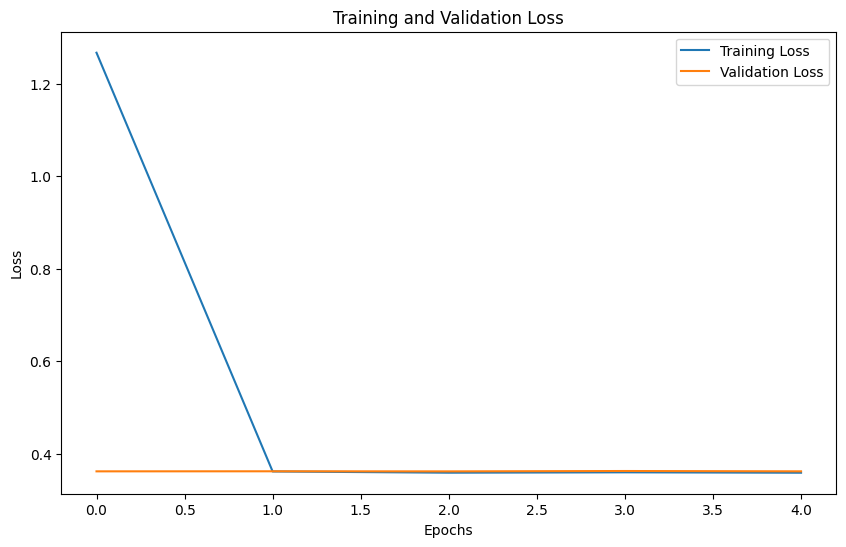

In [77]:
import matplotlib.pyplot as plt

# Plotting the training loss vs validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Save the Model
Save the trained model for submission.

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1. most of the data were object types and I used label encoding to transform them to numiercal type I also droped unwanted columns and filled nan values

2. I used 3 layres of fully connected networks maybe adding more will affect the accuarcy of the model but I have no time to test that

3. I chose small epochs and batch size becouse I don't want the training to take a long time 

4. I choose the sigmoid function becouse it is a classification problem 

5. I used dropout to prevent overfitting 

6. I used model.evaluate and used the accuracy metric 

7. there was no time

8. before dropout it seemd like the model was overfitting

# **THANK YOU :)**